<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:22px;font-style:sans-serif;">Rental market prediction (for Tashkent)</span> 

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;"> Content</span>

1. [Introduction](#Introduction:)
2. [Import libraries](#Import-libraries)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Exploratory data analysis](#Exploratory-data-analysis)
5. [Cross validation](#Cross-validation)
6. [Model implementation](#Model-implementation)
    - SVM
    - Random Forest Regressor
    - XGBRegressor
    - LGBMRegressor
    - GradientBoostingRegressor
7. [Evaluation](#Evaluation)

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Introduction:</span> 

Tashkent, the capital of Uzbekistan, has experienced a significant increase in demand for rental properties over the past few years. With a growing economy and increasing urbanization, the rental market in Tashkent is expected to continue to grow in the coming years.

According to real estate experts, rental prices in Tashkent are expected to rise in the short to medium term. This is due to several factors, including a shortage of rental properties, high demand from a growing middle class, and the increasing popularity of Tashkent as a destination for expatriates and international students.

One trend that is expected to continue in the rental market in Tashkent is the shift towards modern and high-end rental properties. Developers are responding to the growing demand for premium rental properties by building more luxury apartments and townhouses that cater to the needs of the growing middle class.

Overall, the rental market in Tashkent is poised for growth in the coming years, driven by a growing middle class, increasing urbanization, and the rise of modern and high-end rental properties. 

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">Dataset has following attributes:</span> 


* adress: districs of Tashkent city
* rooms: number of rooms
* size: size of house
* floor: house floor
* level: total number of floors
* repair: state of repair of the house
* wall: wall type of the house
* **price: Target column, price of rent per month (US $)**

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Import libraries</span>

In [1]:
import numpy as np  # numerical computing library
import pandas as pd  # data manipulation library
import matplotlib.pyplot as plt  # data visualization library
import seaborn as sns  # data visualization library

# Import machine learning models and evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV  # model selection and hyperparameter tuning

from sklearn import svm # support vector machine model
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor  # gradient boosting model
from lightgbm import LGBMRegressor # light boosting model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # random forest and gradient boosting models


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error   # evaluation metrics for regression models
from sklearn.preprocessing import StandardScaler # for scaling

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Data Preprocessing</span>

Source: www.uybor.uz

In [2]:
# Load rental data from CSV file into a pandas dataframe
data = pd.read_csv('rent_for_analys.csv')
data.head()

,adress,rooms,size,floor,level,repair,wall,price
0,Сергелийский район,3,83.0,3,9.0,Авторский проект,Монолитный,500.0
1,Яшнободский район,1,40.0,3,9.0,Евроремонт,Панельный,450.0
2,Мирабадский район,3,93.0,7,9.0,Евроремонт,Панельный,1000.0
3,Мирабадский район,2,60.0,3,4.0,Авторский проект,Кирпичный,1200.0
4,Шайхантахурский район,2,50.0,2,4.0,Евроремонт,Кирпичный,700.0


In [3]:
# Display a summary of the rental data, including the number of rows, column names, data types, and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   adress  4745 non-null   object 
 1   rooms   4745 non-null   int64  
 2   size    4745 non-null   float64
 3   floor   4745 non-null   object 
 4   level   4741 non-null   float64
 5   repair  4745 non-null   object 
 6   wall    4745 non-null   object 
 7   price   4745 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 296.7+ KB


In [4]:
# Remove any rows with missing values (NaN) from the rental data using the dropna() method
data.dropna(axis=0, inplace=True)

In [5]:
# Convert the 'floor' column of the rental data from a float to an integer using the astype() method
data['floor'] = data['floor'].astype('int')

In [6]:
# Generate a statistical summary of the rental data using the describe() method
data.describe()

,rooms,size,floor,level,price
count,4741.000000,4741.000000,4741.000000,4741.000000,4741.000000
mean,2.519300,77.728116,4.107361,7.169795,996.550791
std,0.986778,42.073831,2.483802,3.303952,625.850167
min,1.000000,3.000000,1.000000,1.000000,10.060000
25%,2.000000,52.000000,2.000000,4.000000,600.000000
50%,2.000000,68.000000,4.000000,7.000000,800.000000
75%,3.000000,90.000000,6.000000,9.000000,1200.000000
max,6.000000,550.000000,25.000000,40.000000,9900.000000


In [7]:
# Generate a summary of the rental data for object (categorical) columns
data.describe(include='object')

,adress,repair,wall
count,4741,4741,4741
unique,12,5,4
top,Мирабадский район,Евроремонт,Кирпичный
freq,844,3661,3310


<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Exploratory data analysis</span>

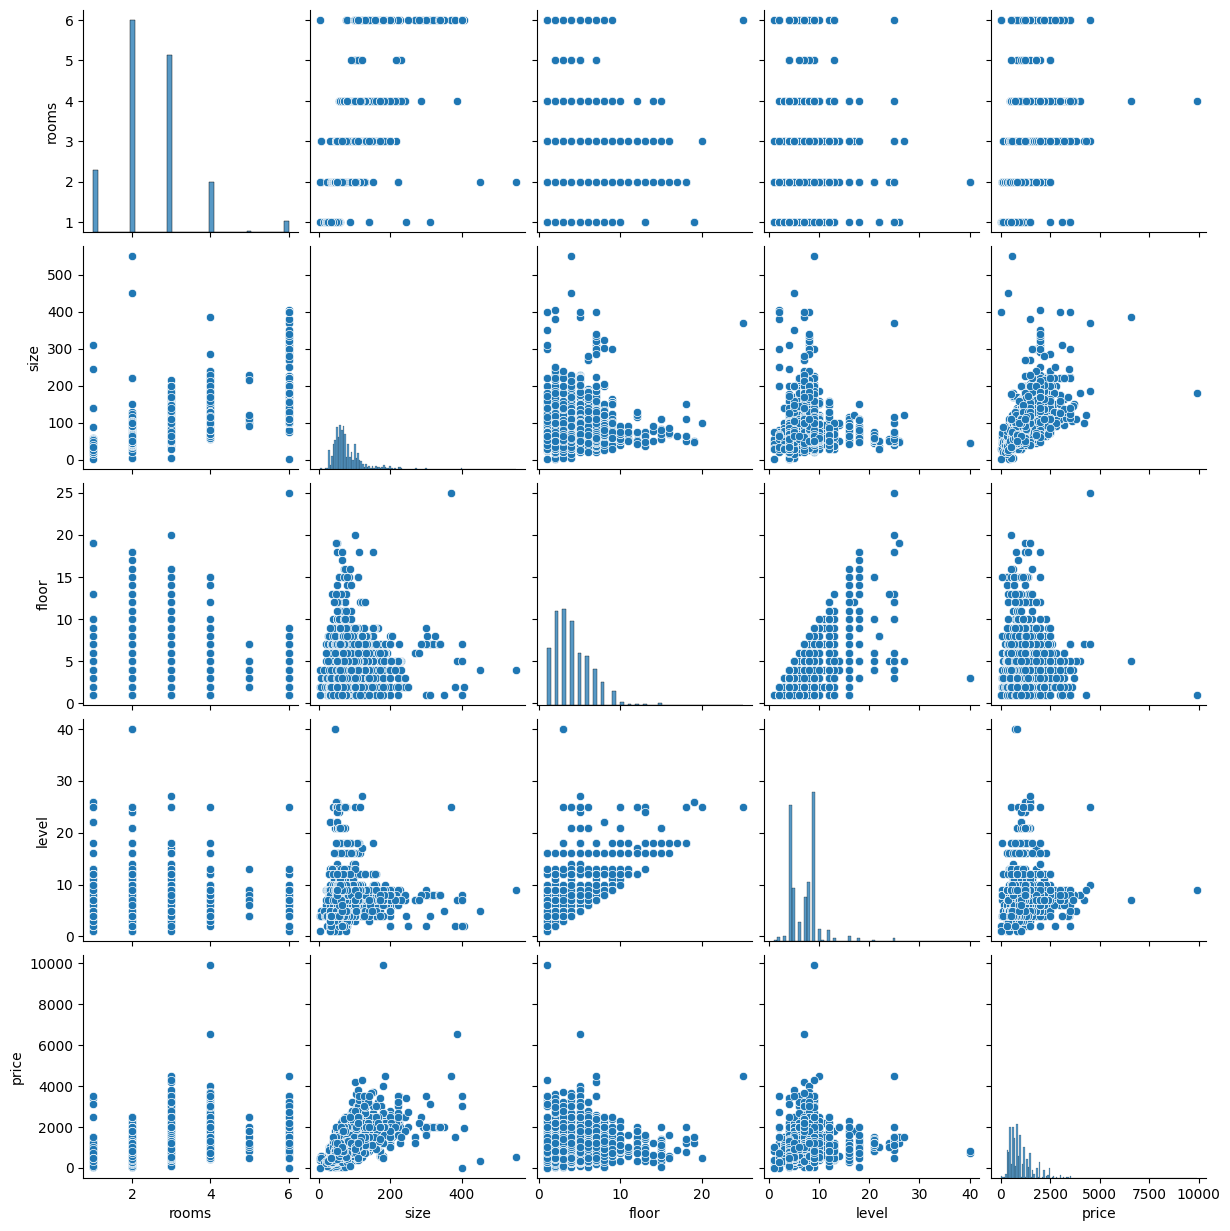

In [8]:
# Create a scatterplot matrix with one scatterplot for each pair of variables, and a histogram
sns.pairplot(data= data)
plt.show()

**Here seen that:**
* In rooms & size columns has uncorrect values
* Size & Price columns have outliers

In [9]:
# Calculate the 99th percentile of the rental price data using the quantile() method
price_99 = data.price.quantile(0.99)
# Filter the rental data to remove any listings with prices above the 99th percentile
data = data[data.price < price_99]

# Calculate the 99th percentile of the rental size data using the quantile() method
size_99 = data['size'].quantile(0.99)
# Filter the rental data to remove any listings with sizes above the 99th percentile
data = data[data['size'] < size_99]

In [10]:
# Find the indices of any rental listings with a size greater than 140 square meters and 2 rooms
ind = data[(data['size'] > 140) & (data['rooms'] == 2)].index
# Drop any rental listings that match these criteria
data.drop(ind, inplace=True)

# Find the indices of any rental listings with a size greater than 70 square meters and 1 room
ind2 = data[(data['size'] > 70) & (data['rooms'] == 1)].index
# Drop any rental listings that match these criteria
data.drop(ind2, inplace=True)

# Find the indices of any rental listings with a size less than 15 square meters
ind3 = data[(data['size'] < 15)].index
# Drop any rental listings that match these criteria
data.drop(ind3, inplace=True)

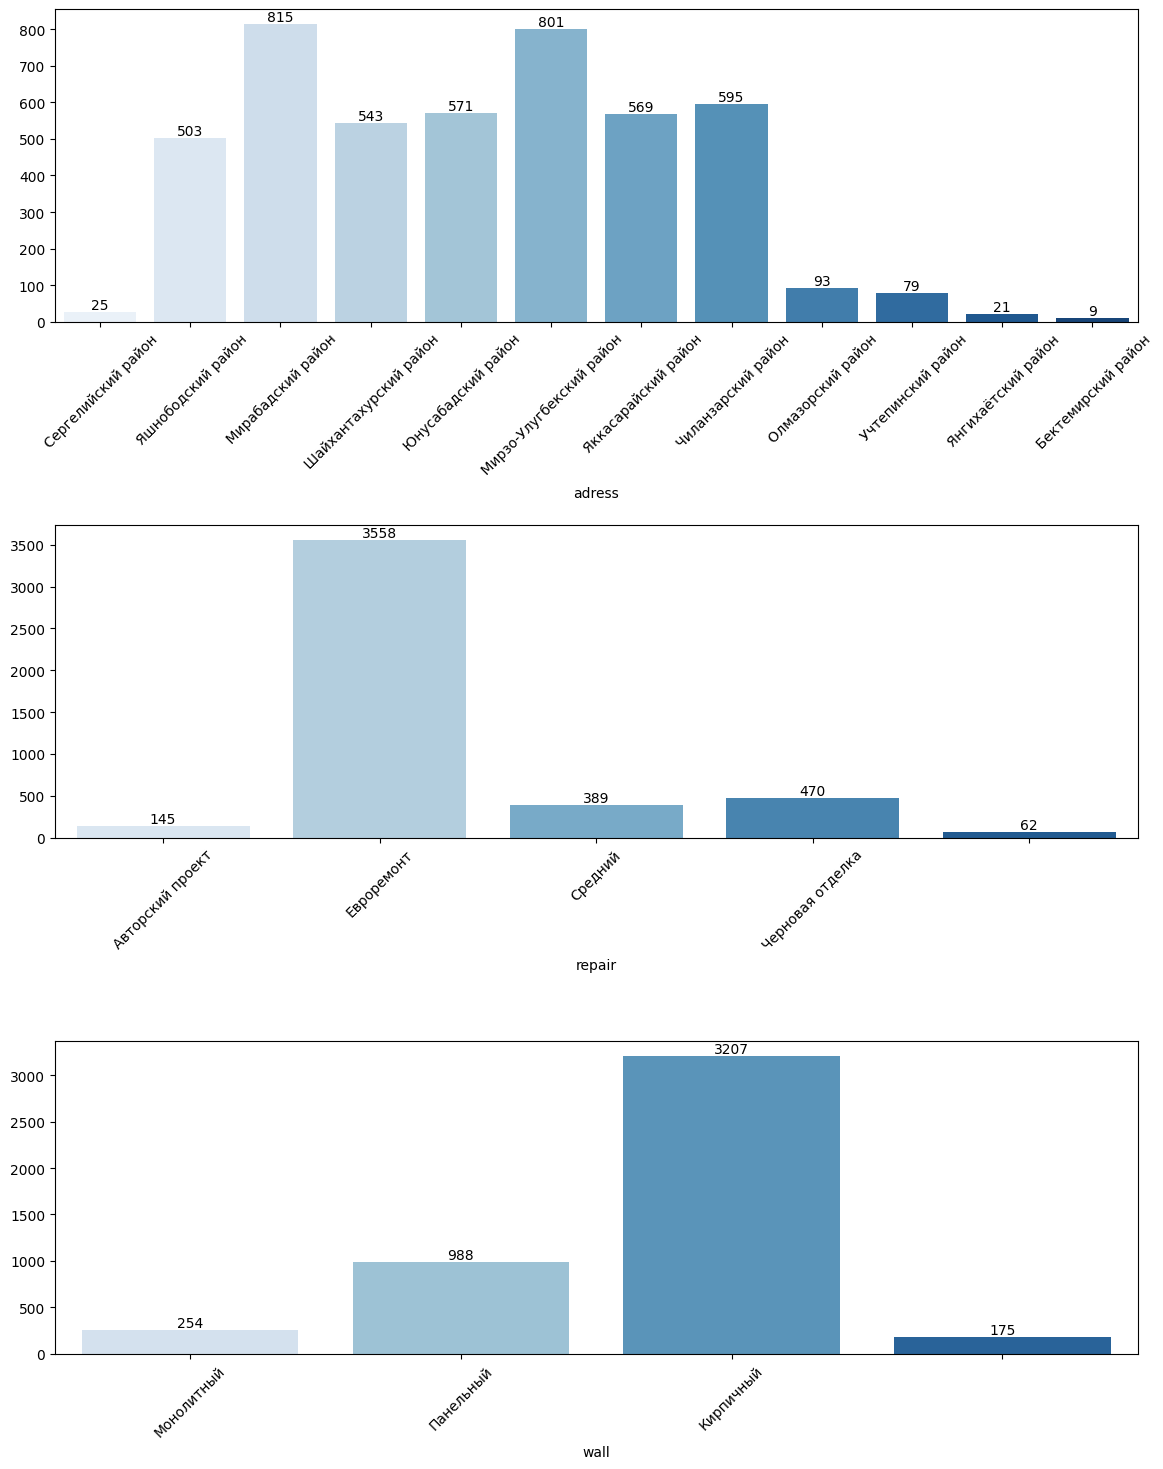

In [11]:
# Identify categorical columns in the data and create a list of their names
cat_cols_ind = [data[i].dtype == 'object' for i in data.columns]
cat_cols = list(data.columns[cat_cols_ind])

# Create a subplot with 3 rows and 1 column, each containing a countplot for a categorical column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
for idx, column in enumerate(cat_cols):
    ax = axes[idx]
    sns.countplot(x=column, data=data, ax=ax, palette = 'Blues');
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)
    for container in ax.containers:
        ax.bar_label(container)
        
# Adjust the spacing between the plots
fig.tight_layout(pad=1.8)

In [12]:
# Replace all empty string values with NaN values
data.replace(' ', np.nan, inplace=True)

# Fill NaN values in 'wall' and 'repair' columns with 'Кирпичный' and 'Евроремонт', respectively
data.fillna({'wall' : 'Кирпичный', 'repair' : 'Евроремонт'}, inplace=True)

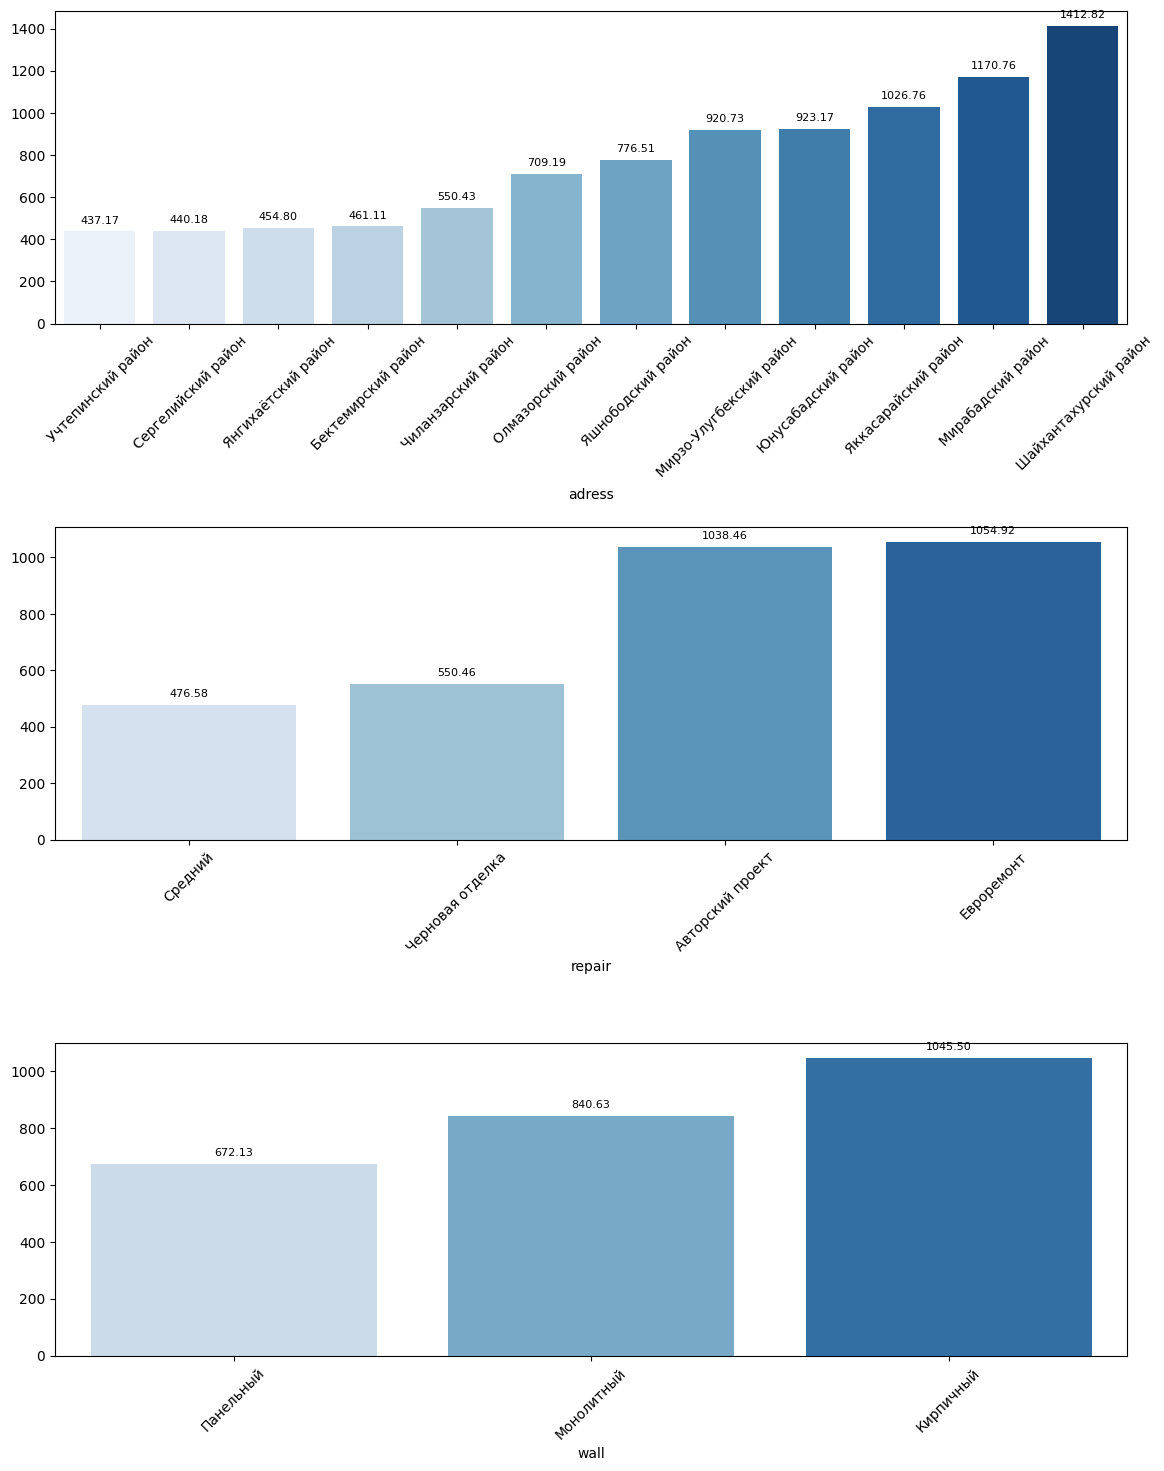

In [13]:
# Group the data by the categorical columns and calculate the mean price for each category

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
for idx, column in enumerate(cat_cols):
    
    data_grouped = data.groupby(column)['price'].mean().sort_values()
    
    # Plot the bar chart
    ax = axes[idx]
    plots = sns.barplot(x = data_grouped.index, y = data_grouped.values, palette = 'Blues', ax=ax)
    
    # Set axis labels and ticks
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)
    
    # Annotate the bar chart with the mean prices
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=8, xytext=(0, 8),
                        textcoords='offset points')

# Adjust the spacing between the plots
fig.tight_layout(pad = 1.8)

In [14]:
# Reset the index of the DataFrame 'data'
data.reset_index(drop = True, inplace=True)

C:\Users\qiziq\AppData\Local\Temp\ipykernel_10984\421163456.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(), annot=True, vmin=0, vmax=1, cmap = 'Blues', fmt='.2f', annot_kws={'fontsize' : 8})


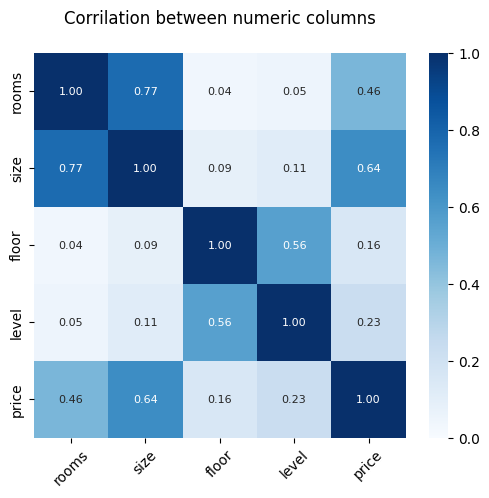

In [15]:
# Creates a heatmap of the absolute correlation values between each pair of columns in the DataFrame 'data'
plt.figure(figsize=(6,5))

sns.heatmap(data.corr().abs(), annot=True, vmin=0, vmax=1, cmap = 'Blues', fmt='.2f', annot_kws={'fontsize' : 8})
plt.title('Corrilation between numeric columns\n', fontdict={'fontsize' : 12})
plt.xticks(rotation = 45)
plt.show()

In [16]:
# Create dummy variables for categorical features and calculate correlation coefficients
data_dummies = pd.get_dummies(data)
corel = data_dummies.corrwith(data_dummies.price).abs().sort_values(ascending=False)

# Filter the features with correlation coefficient greater than 0.2 and print the results
corel[corel > 0.2]

price                            1.000000
size                             0.640924
rooms                            0.461863
repair_Евроремонт                0.354510
adress_ Шайхантахурский район    0.310759
adress_ Чиланзарский район       0.288604
wall_Кирпичный                   0.279214
wall_Панельный                   0.273563
repair_Средний                   0.269211
repair_Черновая отделка          0.252598
level                            0.232198
dtype: float64

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Cross validation</span>

In [17]:
# Select all columns except 'price' from the data_dummies dataframe and assign the result to the X variable.
X = data_dummies.drop('price', axis=1)

# Select the 'price' column from the data_dummies dataframe and assign it to the y variable.
y = data_dummies.price

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2, 
                                                    random_state=73)

In [19]:
# Create a StandardScaler object and store it in the scaler variable.
scaler = StandardScaler()

# Use the fit_transform method of the scaler object to standardize the features in the X_train dataset,
# and store the standardized features in the X_train_scaled variable.
X_train_scaled = scaler.fit_transform(X_train)

# Use the transform method of the scaler object to standardize the features in the X_test dataset,
# using the parameters learned from the X_train dataset, and store the standardized features in the X_test_scaled variable.
X_test_scaled = scaler.transform(X_test)

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Model implementation</span>

<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">SVM</span>

In [20]:
# Define the SVM model
svm_model = svm.SVR()

# Define the hyperparameters to search over
params = {
    'gamma': [0.01, 0.001, 0.0001],
    'C': [1, 10, 100, 1000]
}

# Perform a grid search to find the best hyperparameters
grid_search_svm = GridSearchCV(svm_model, params, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search_svm.best_params_)
print("Best score: ", grid_search_svm.best_score_)

Best hyperparameters:  {'C': 1000, 'gamma': 0.01}
Best score:  0.6591121612317417


In [23]:
# Function that returns prediction, r2, mae, mse

def model_info(model, X_test, y_test):
    pred = model.predict(X_test)
    
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    
    return pred, r2, mae, mse

In [24]:
pred_svm, r2_svm, mae_svm, mse_svm = model_info(grid_search_svm, X_test_scaled, y_test)

print(f'R2 score of model: {round(r2_svm*100, 2)}%')
print(f'Mean absolute error: {round(mae_svm, 2)}')
print(f'Mean squared error: {round(mse_svm **0.5, 2)}')

R2 score of model: 65.32%
Mean absolute error: 219.19
Mean squared error: 320.07


<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">Random Forest Regressor</span>

In [66]:
# Create a Random Forest Regressor
rf_model = RandomForestRegressor()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_rf.best_params_)
print("Best Score: ", grid_search_rf.best_score_)

Best Hyperparameters:  {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.7361223983549205


In [25]:
pred_rf, r2_rf, mae_rf, mse_rf = model_info(grid_search_rf, X_test, y_test)

print(f'R2 score of model: {round(r2_rf*100, 2)}%')
print(f'Mean absolute error: {round(mae_rf, 2)}')
print(f'Mean squared error: {round(mse_rf **0.5, 2)}')

R2 score of model: 75.65%
Mean absolute error: 186.61
Mean squared error: 268.2


<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">XGBRegressor</span>

In [29]:
# Create the XGBRegressor model
model_xgb = XGBRegressor()

# Define the parameter grid to search
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Instantiate GridSearchCV
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=5)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_xgb.best_params_)
print("Best Score: ", grid_search_xgb.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Best Score:  0.7319092801361209


In [31]:
pred_xgb, r2_xgb, mae_xgb, mse_xgb = model_info(grid_search_xgb, X_test_scaled, y_test)

print(f'R2 score of model: {round(r2_xgb*100, 2)}%')
print(f'Mean absolute error: {round(mae_xgb, 2)}')
print(f'Mean squared error: {round(mse_xgb **0.5, 2)}')

R2 score of model: 73.85%
Mean absolute error: 192.59
Mean squared error: 277.93


<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">LGBMRegressor</span>

In [34]:
# Create the LGBMRegressor model
model_lgb = LGBMRegressor()

# Define the parameter grid to search
param_grid_lgb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127]
}

# Instantiate GridSearchCV
grid_search_lgb = GridSearchCV(estimator=model_lgb, param_grid=param_grid_lgb, cv=5)

# Fit the grid search to the data
grid_search_lgb.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_lgb.best_params_)
print("Best Score: ", grid_search_lgb.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 31}
Best Score:  0.7138911344858639


In [35]:
pred_xgb, r2_lgb, mae_lgb, mse_lgb = model_info(grid_search_lgb, X_test_scaled, y_test)

print(f'R2 score of model: {round(r2_lgb*100, 2)}%')
print(f'Mean absolute error: {round(mae_lgb, 2)}')
print(f'Mean squared error: {round(mse_lgb **0.5, 2)}')

R2 score of model: 74.12%
Mean absolute error: 196.51
Mean squared error: 276.52


<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">GradientBoostingRegressor</span>

In [36]:
# Create the GradientBoostingRegressor model
model_gb = GradientBoostingRegressor()

# Define the parameter grid to search
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}


# Instantiate GridSearchCV
grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid_gb, cv=5)

# Fit the grid search to the data
grid_search_gb.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_gb.best_params_)
print("Best Score: ", grid_search_gb.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Best Score:  0.7279241313777517


In [37]:
pred_gb, r2_gb, mae_gb, mse_gb = model_info(grid_search_gb, X_test_scaled, y_test)

print(f'R2 score of model: {round(r2_gb*100, 2)}%')
print(f'Mean absolute error: {round(mae_gb, 2)}')
print(f'Mean squared error: {round(mse_gb **0.5, 2)}')

R2 score of model: 73.8%
Mean absolute error: 193.97
Mean squared error: 278.18


<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Evaluation</span>

In [128]:
models= pd.DataFrame([model_info(grid_search_svm, X_test_scaled, y_test)[1:],
                     model_info(grid_search_rf, X_test, y_test)[1:],
                     model_info(grid_search_xgb, X_test_scaled, y_test)[1:],
                     model_info(grid_search_lgb, X_test_scaled, y_test)[1:],
                     model_info(grid_search_gb, X_test_scaled, y_test)[1:]],
                     columns= ['R2', 'MAE', 'MSE'],
                     index = ['Support Vector Machine', 'Random Forest Regressor',
                               'XGBRegressor', 'LGBMRegressor', 'GradientBoostingRegressor'])
models['R2'] = models['R2'] * 100
models['MSE'] = models['MSE']**0.5

models.style.highlight_min(color = 'lightgreen', axis = 0, subset=['MAE', 'MSE'])

,R2,MAE,MSE
Support Vector Machine,65.319398,219.194477,320.071448
Random Forest Regressor,75.872163,186.408037,266.970220
XGBRegressor,73.850546,192.588415,277.929684
LGBMRegressor,74.115668,196.509536,276.517167
GradientBoostingRegressor,73.803154,193.969422,278.181424


In [129]:
# Most differences in random forest model
rm_df = pd.DataFrame()
rm_df['test'] = y_test.round(0)
rm_df['pred'] = pred_rf.round(0)
rm_df['diff'] = (y_test - pred_rf).abs().round(0)
rm_df['diff %'] = ((y_test - pred_rf) / y_test * 100).abs().round(0)

rm_df.sort_values('diff %', ascending=False)

,test,pred,diff,diff %
2045,56.0,843.0,787.0,1403.0
1323,100.0,660.0,560.0,560.0
1827,800.0,2131.0,1331.0,166.0
908,350.0,784.0,434.0,124.0
393,300.0,668.0,368.0,123.0
...,...,...,...,...
4141,600.0,598.0,2.0,0.0
3869,1300.0,1297.0,3.0,0.0
4501,600.0,598.0,2.0,0.0
861,500.0,501.0,1.0,0.0


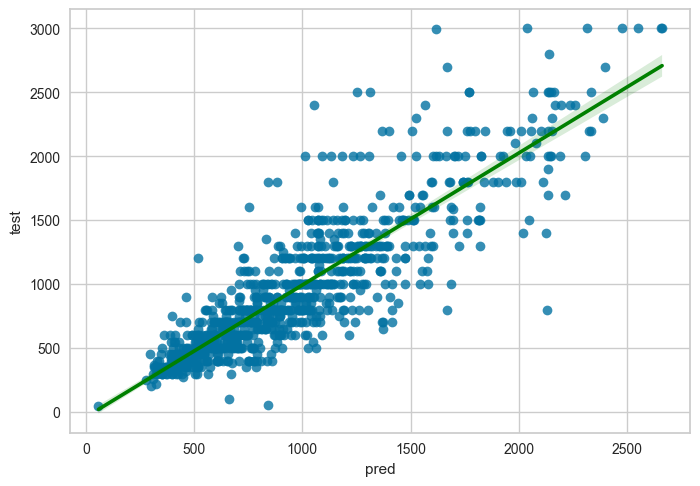

In [130]:
# Create scatterplot with regression line
sns.regplot(data=rm_df, x='pred', y='test', line_kws={'color': 'green'})

# Display the plot
plt.show()

Based on the analysis of monthly rent prices in Tashkent using different machine learning models, it was found that Random Forest Regressor had the highest R2 score of 0.7587, indicating a better fit to the data. It also had the lowest MAE and RMSE values of 186.408 and 71,273, respectively, indicating better accuracy in predicting the rent prices.

The other models, including XGBRegressor, LGBMRegressor, GradientBoostingRegressor, and Support Vector Machine, also had decent R2 scores ranging from 0.653 to 0.741. However, their MAE and RMSE values were comparatively higher, indicating less accuracy in predicting the rent prices.

Therefore, based on the analysis, Random Forest Regressor is recommended for predicting monthly rent prices in Tashkent due to its better performance in terms of R2, MAE, and RMSE values.